In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Load iris dataset
df = sns.load_dataset('iris')
print(df.head())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [22]:
X = df.drop('species', axis=1)
y = df['species']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} → Accuracy: {acc:.2f}")

K=1 → Accuracy: 0.97
K=3 → Accuracy: 1.00
K=5 → Accuracy: 1.00
K=7 → Accuracy: 1.00
K=9 → Accuracy: 1.00


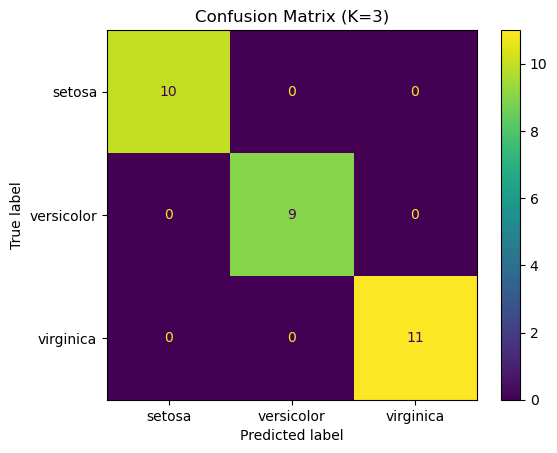

In [30]:
best_k = 3  # Choose based on highest accuracy from above
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

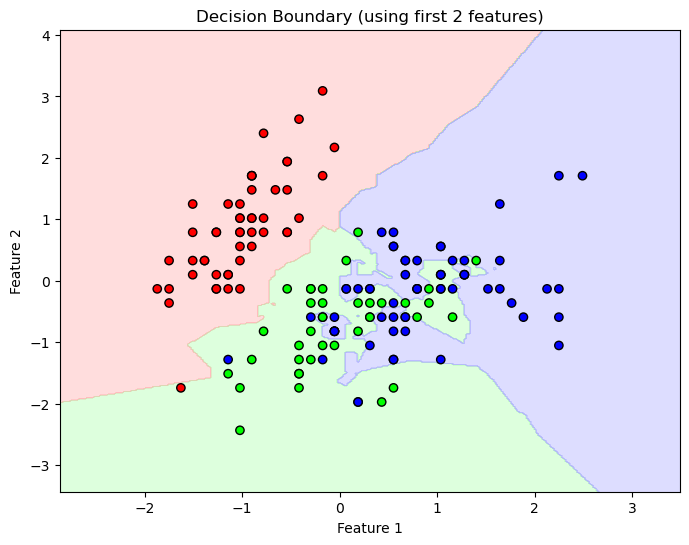

In [34]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Convert species labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use first two features for visualization
X_viz = X_scaled[:, :2]
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y_encoded, test_size=0.2, random_state=42)

# Train KNN on 2D features
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_viz, y_train_viz)

# Create meshgrid
h = 0.02
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y_encoded, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
plt.title("Decision Boundary (using first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()